In [1]:
from fxy import fint, fsem
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from time import perf_counter

eps = np.finfo(np.float64).eps

In [2]:
X, Y = np.mgrid[0.1:40.0:200j, 0.1:40.0:200j]

FI = np.load('fi.npy')
FxI = np.load('fxi.npy')
FxxI = np.load('fxxi.npy')
TI = np.load('ti.npy')
FS = np.load('fs.npy')
FxS = np.load('fxs.npy')
FxxS = np.load('fxxs.npy')
TS = np.load('ts.npy')

In [3]:
# FI = np.empty_like(X)
# FxI = np.empty_like(X)
# FxxI = np.empty_like(X)
# FS = np.empty_like(X)
# FxS = np.empty_like(X)
# FxxS = np.empty_like(X)
# TI = np.empty_like(X)
# TS = np.empty_like(X)

# nt = 10  # Number of times each point is evaluated.

# for i, x in enumerate(X[:, 0]):
#     for j, y in enumerate(Y[0, :]):
#         time_start = perf_counter()
#         for n in range(nt):
#             fi, fxi, fxxi = fint(x, y)
#         TI[i, j] = (perf_counter() - time_start)/nt
#         FI[i, j], FxI[i, j], FxxI[i, j] = (fi, fxi, fxxi)

#         time_start = perf_counter()
#         for n in range(nt):
#             fs, fxs, fxxs = fsem(x, y)
#         TS[i, j] = (perf_counter() - time_start)/nt
#         FS[i, j], FxS[i, j], FxxS[i, j] = (fs, fxs, fxxs)

# np.save('fi.npy', FI)
# np.save('fxi.npy', FxI)
# np.save('fxxi.npy', FxxI)
# np.save('ti.npy', TI)
# np.save('fs.npy', FS)
# np.save('fxs.npy', FxS)
# np.save('fxxs.npy', FxxS)
# np.save('ts.npy', TS)

In [4]:
def plot_surface(X, Y, Z, zmin, zmax, title=r'', fname=''):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlim([zmin, zmax])
    ax.grid(False)
    ax.view_init(elev=20, azim=-60)
    
    sf = ax.plot_surface(X, Y, Z, cmap='cool', axlim_clip=True, linewidth=0.2, edgecolor='black')

    if fname:
        fig.savefig(fname+'.svg', bbox_inches='tight')
    
    plt.show()

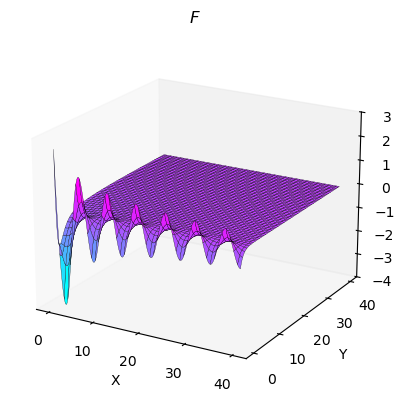

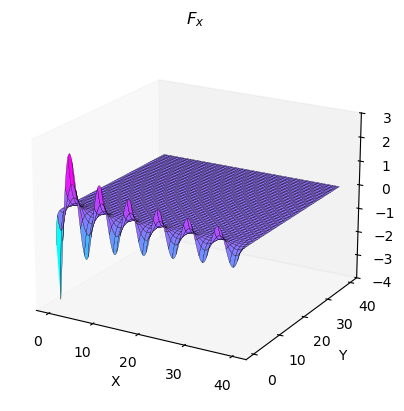

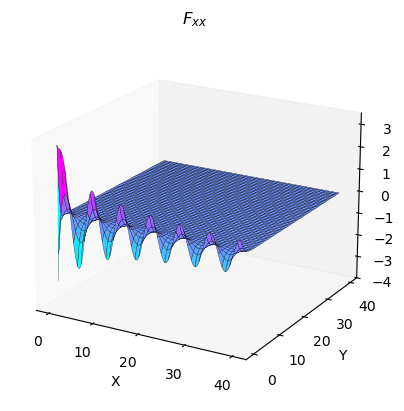

In [5]:
plot_surface(X, Y, FS, -4.0, 3.0, r'$F$', 'surff')
plot_surface(X, Y, FxS, -4.0, 3.0, r'$F_x$', 'surffx')
plot_surface(X, Y, FxxS, -4.0, 3.5, r'$F_{xx}$', 'surffxx')

In [6]:
def plot_error(X, Y, ZI, ZS, title='', fname=''):
    abs_dif_Z = np.abs(ZI - ZS)
    abs_dif_Z[abs_dif_Z < eps] = eps
    min_abs_dif_Z = eps
    max_abs_dif_Z = abs_dif_Z.max()
        
    fig, ax = plt.subplots(figsize=(7,6))
    
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    lev_exp = np.arange(np.floor(np.log10(min_abs_dif_Z)-1),
                        np.ceil(np.log10(max_abs_dif_Z)+1))
    levs = np.power(10, lev_exp)
    
    cs = ax.contourf(X, Y, abs_dif_Z, levs, locator=ticker.LogLocator())
    
    cbar = fig.colorbar(cs)
    
    if fname:
        fig.savefig(fname+'.svg', bbox_inches='tight')
    
    plt.show()

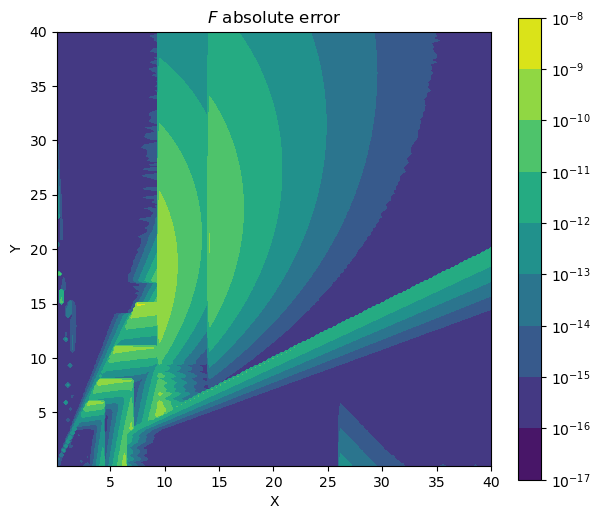

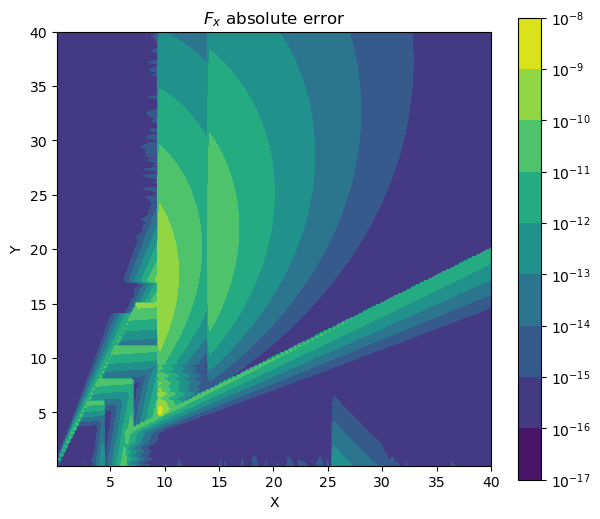

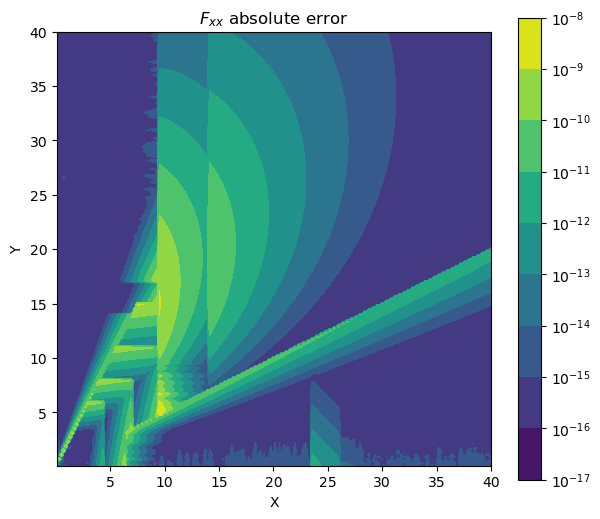

In [7]:
plot_error(X, Y, FI, FS, title=r'$F$ absolute error', fname='errorf')
plot_error(X, Y, FxI, FxS, title=r'$F_x$ absolute error', fname='errorfx')
plot_error(X, Y, FxxI, FxxS, title=r'$F_{xx}$ absolute error', fname='errorfxx')

In [8]:
abs_dif_F = np.abs(FI - FS)
max_abs_dif_F = abs_dif_F.max()

abs_dif_Fx = np.abs(FxI - FxS)
max_abs_dif_Fx = abs_dif_Fx.max()

abs_dif_Fxx = np.abs(FxxI - FxxS)
max_abs_dif_Fxx = abs_dif_Fxx.max()

print(max_abs_dif_F)
print(max_abs_dif_Fx)
print(max_abs_dif_Fxx)

1.1882903272475431e-09
2.1616037328142657e-09
7.258058228650638e-09


In [9]:
def plot_time(X, Y, T, title='', fname=''):
    fig, ax = plt.subplots(figsize=(7,6))
    
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    cs = ax.contourf(X, Y, T, locator=ticker.LogLocator())
    
    cbar = fig.colorbar(cs)
    
    if fname:
        fig.savefig(fname+'.svg', bbox_inches='tight')
    
    plt.show()

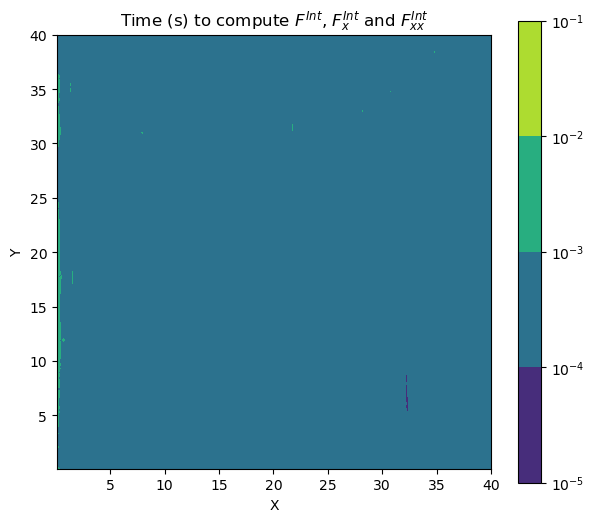

In [10]:
plot_time(X, Y, TI, r'Time (s) to compute $F^{Int}$, $F^{Int}_x$ and $F^{Int}_{xx}$')

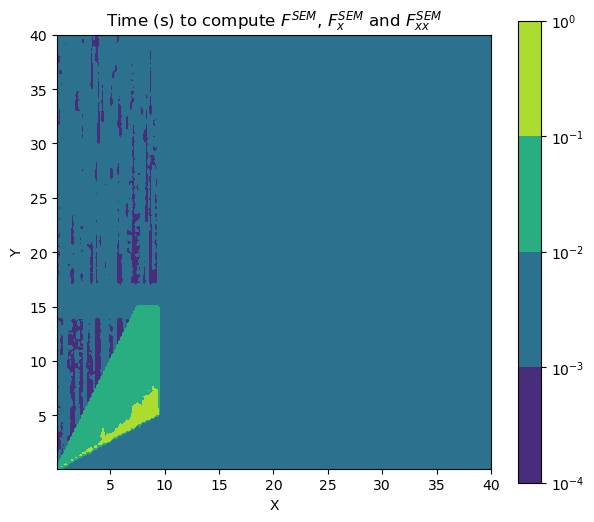

In [11]:
plot_time(X, Y, TS, r'Time (s) to compute $F^{SEM}$, $F^{SEM}_x$ and $F^{SEM}_{xx}$')

In [12]:
meanTS = TS.mean()
meanTI = TI.mean()

print(f'Mean time for evaluation of fint = {meanTI:.5f} seconds')
print(f'Mean time for evaluation of fsem = {meanTS:.5f} seconds')
print(f'fint is {meanTS/meanTI:.0f} times faster than fsem')

Mean time for evaluation of fint = 0.00034 seconds
Mean time for evaluation of fsem = 0.00590 seconds
fint is 17 times faster than fsem
